# Machine Learning Project: Predicting Boston House Prices With Regression

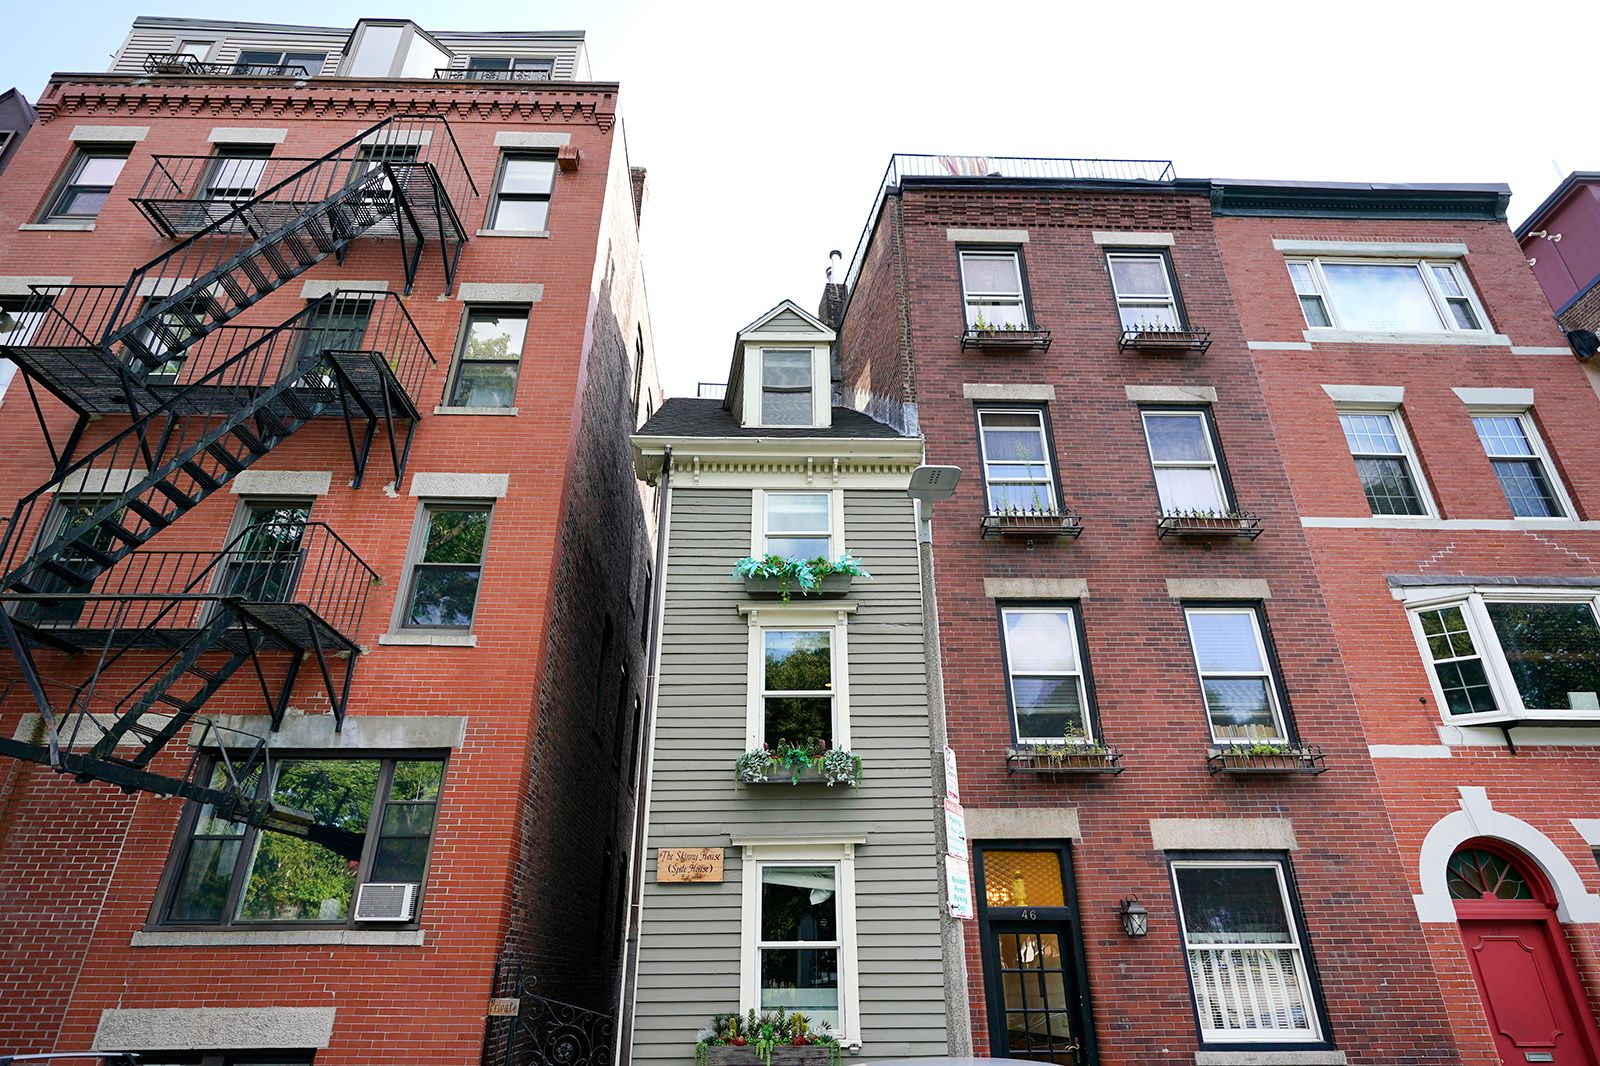

## Introduction


In this project, we will develop and evaluate the performance and the predictive power of a model trained and tested on data collected from houses in Boston’s suburbs.

Once we get a good fit, we will use this model to predict the monetary value of a house located at the Boston’s area.

A model like this would be very valuable for a real state agent who could make use of the information provided in a dayly basis.

### Installing the required libraries

In [118]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_boston

### Importing dataset

In [119]:
ds=load_boston()

In [120]:
ds

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

Here 'Data' is the input/X/independent data, means all those 13 variables are present here,

'Target' is the output/Y/label/Dependent data, these are the house prices in US dollars(thousand).

'Feature Names' are all the columns.

'DESCR' is the discription.

'Number of Instances' is the number of rows

In [121]:
ds.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [122]:
ds.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [123]:
ds.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

AS this data is of 1960s that's why the price of houses is low

In [124]:
#getting all the columns name
ds.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [125]:
#here the data is in form of numpy array so lets convert it into a dataframe
#Dataframe has the capability to show the data in two dimensional structures
df=pd.DataFrame(data=ds.data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [126]:
df=pd.DataFrame(data=ds.data, columns=ds.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [127]:
df['target']=pd.DataFrame(ds.target)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [128]:
#checking the rows and columns present in our dataset
df.shape

(506, 14)

In [129]:
#checking the datatype of our columns
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [130]:
#getting first five rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [131]:
#getting bottom five rows
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [132]:
#getting any random row
df.sample()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [133]:
#getting any three random rows
df.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
202,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64,10.4
62,0.11027,25.0,5.13,0.0,0.453,6.456,67.8,7.2255,8.0,284.0,19.7,396.90,6.73,22.2


In [134]:
#Checking whether there is any null value in our data or not
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [135]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

No null values are present in our dataset

<AxesSubplot:>

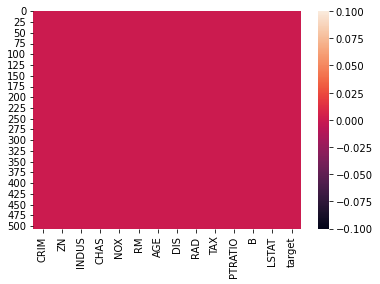

In [136]:
sns.heatmap(df.isnull())

We can see there is no missing data

In [137]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Count row showing equal values in every column means there is no missing data.

High standard deviation is present in CRIM, ZN, INDUS, AGE, TAX variables, means data is too much spreaded, Range is high

CRIM, INDUS, RAD has mean greater than median, it means CRIM has right skewed data, large gap is present between 75th percentile and max in CRIM, ZN, INDUS, hence outliers are present.

In [138]:
#Checking the skewness
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
target     1.108098
dtype: float64

<AxesSubplot:>

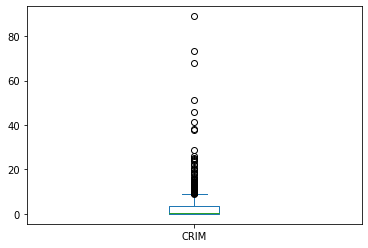

In [139]:
#displaying the outliers of columns having high skewness by plotting box plot
df['CRIM'].plot.box()

<AxesSubplot:>

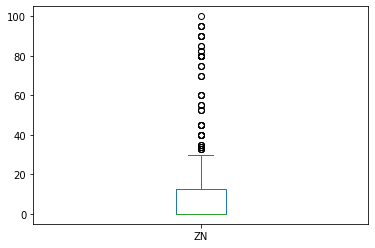

In [140]:
df['ZN'].plot.box()

<AxesSubplot:>

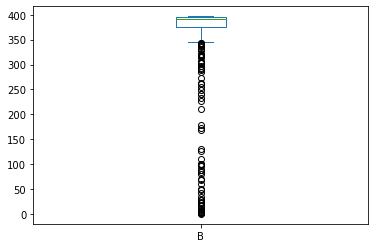

In [141]:
df['B'].plot.box()

In [142]:
#removing outliers using zscore
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.419782,0.284830,1.287909,0.272599,0.144217,0.413672,0.120013,0.140214,0.982843,0.666608,1.459000,0.441052,1.075562,0.159686
1,0.417339,0.487722,0.593381,0.272599,0.740262,0.194274,0.367166,0.557160,0.867883,0.987329,0.303094,0.441052,0.492439,0.101524
2,0.417342,0.487722,0.593381,0.272599,0.740262,1.282714,0.265812,0.557160,0.867883,0.987329,0.303094,0.396427,1.208727,1.324247
3,0.416750,0.487722,1.306878,0.272599,0.835284,1.016303,0.809889,1.077737,0.752922,1.106115,0.113032,0.416163,1.361517,1.182758
4,0.412482,0.487722,1.306878,0.272599,0.835284,1.228577,0.511180,1.077737,0.752922,1.106115,0.113032,0.441052,1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.413229,0.487722,0.115738,0.272599,0.158124,0.439316,0.018673,0.625796,0.982843,0.803212,1.176466,0.387217,0.418147,0.014454
502,0.415249,0.487722,0.115738,0.272599,0.158124,0.234548,0.288933,0.716639,0.982843,0.803212,1.176466,0.441052,0.500850,0.210362
503,0.413447,0.487722,0.115738,0.272599,0.158124,0.984960,0.797449,0.773684,0.982843,0.803212,1.176466,0.441052,0.983048,0.148802
504,0.407764,0.487722,0.115738,0.272599,0.158124,0.725672,0.736996,0.668437,0.982843,0.803212,1.176466,0.403225,0.865302,0.057989


In [143]:
#threshold for zscore values ---> above three are considered as outliers
threshold=3
print(np.where(z>3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [144]:
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
target     1.108098
dtype: float64

<AxesSubplot:ylabel='Frequency'>

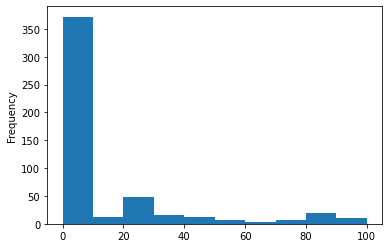

In [145]:
df['ZN'].plot.hist()

Here we can see the data is skewed or the data is assymetric

<AxesSubplot:ylabel='Frequency'>

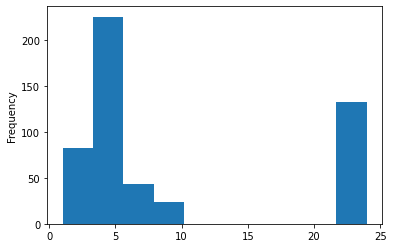

In [146]:
df['RAD'].plot.hist()

Cleansing of data can be done in two ways:

By log method:
df1['Fare']=np.log(df1['Fare']) by defining in this way and then plotting the plot

df1['CRIM'].plot.hist()

2.Using boxcox method:

df1['CRIM']=boxcox(df1['CRIM'],0)

In [147]:
from scipy.stats import boxcox
#0 -> log transform
#0.5 -> square root transform
df['CRIM']=boxcox(df['CRIM'],0)

<AxesSubplot:ylabel='Frequency'>

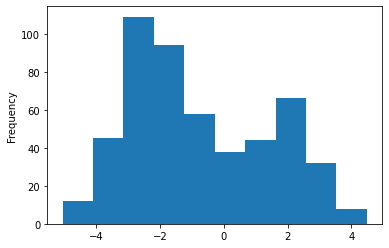

In [148]:
df['CRIM'].plot.hist()

In [171]:
df['B']=boxcox(df['B'],0)

<AxesSubplot:ylabel='Frequency'>

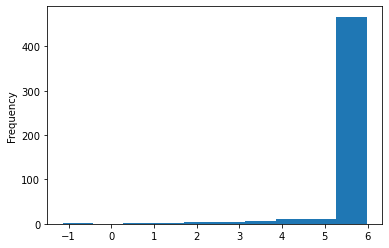

In [172]:
df['B'].plot.hist()

### Data Visualisation

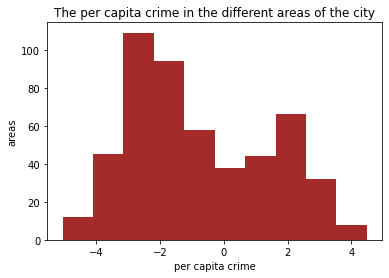

In [151]:
plt.hist(df['CRIM'], bins = 10, color = 'brown')
plt.title('The per capita crime in the different areas of the city')
plt.xlabel('per capita crime')
plt.ylabel('areas')
plt.show()
     

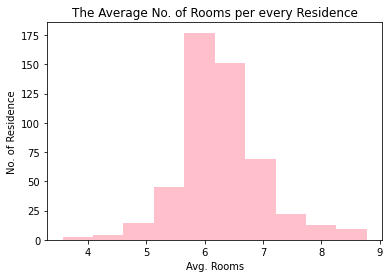

In [152]:

plt.hist(df['RM'], bins = 10, color = 'pink')
plt.title('The Average No. of Rooms per every Residence')
plt.xlabel('Avg. Rooms')
plt.ylabel('No. of Residence')
plt.show()

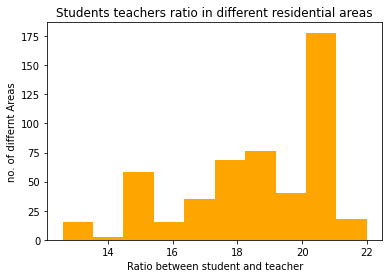

In [154]:

# checking the student teacher ratio in the nearby town

plt.hist(df['PTRATIO'], bins = 10, color = 'orange')
plt.title('Students teachers ratio in different residential areas')
plt.xlabel('Ratio between student and teacher')
plt.ylabel('no. of differnt Areas')
plt.show()

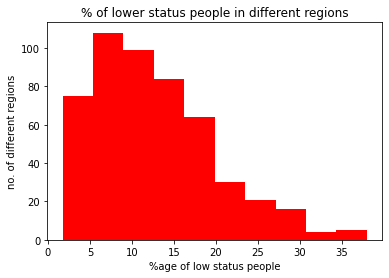

In [156]:
# checking the percentage of lower status people in the nearby town

plt.hist(df['LSTAT'], bins = 10, color = 'red')
plt.title('% of lower status people in different regions')
plt.xlabel('%age of low status people')
plt.ylabel('no. of different regions')
plt.show()

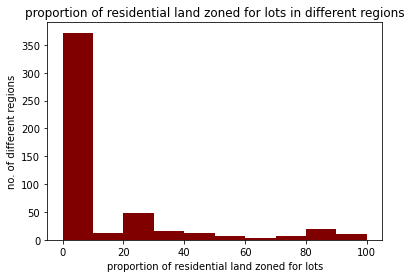

In [157]:

# analyzing the ZN: proportion of residential land zoned for lots over 25,000 sq.ft

plt.hist(df['ZN'], bins = 10, color = 'maroon')
plt.title('proportion of residential land zoned for lots in different regions')
plt.xlabel('proportion of residential land zoned for lots')
plt.ylabel('no. of different regions')
plt.show()

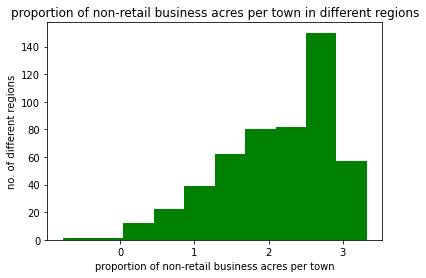

In [159]:
# analyzing  INDUS: proportion of non-retail business acres per town 

plt.hist(df['INDUS'], bins = 10, color = 'green')
plt.title('proportion of non-retail business acres per town in different regions')
plt.xlabel('proportion of non-retail business acres per town')
plt.ylabel('no. of different regions')
plt.show()


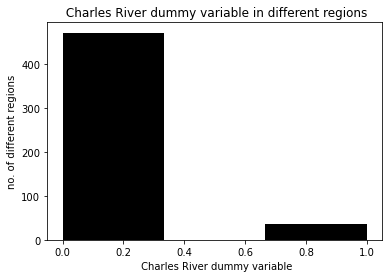

In [160]:
# analyzing CHAS: Charles River dummy variable (= 1 if tract(area of land) bounds river; 0 otherwise)

plt.hist(df['CHAS'], bins = 3, color = 'black')
plt.title(' Charles River dummy variable in different regions')
plt.xlabel(' Charles River dummy variable')
plt.ylabel('no. of different regions')
plt.show()

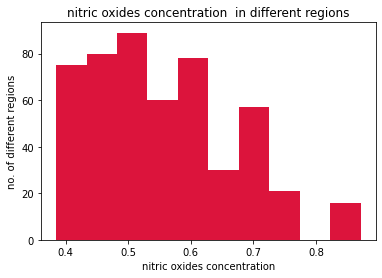

In [161]:
# analyzing 5. NOX: nitric oxides concentration (parts per 10 million)


plt.hist(df['NOX'], bins = 10, color = 'crimson')
plt.title('nitric oxides concentration  in different regions')
plt.xlabel('nitric oxides concentration')
plt.ylabel('no. of different regions')
plt.show()

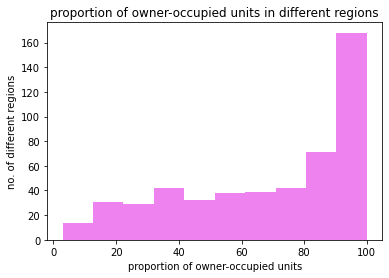

In [164]:
# analyzing AGE: proportion of owner-occupied units built prior to 1940

plt.hist(df['AGE'], bins = 10, color = 'violet')
plt.title('proportion of owner-occupied units in different regions')
plt.xlabel('proportion of owner-occupied units')
plt.ylabel('no. of different regions')
plt.show()

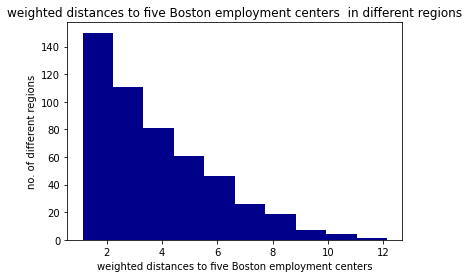

In [165]:

# analyzing DIS: weighted distances to ﬁve Boston employment centers 

plt.hist(df['DIS'], bins = 10, color = 'darkblue')
plt.title('weighted distances to ﬁve Boston employment centers  in different regions')
plt.xlabel('weighted distances to ﬁve Boston employment centers')
plt.ylabel('no. of different regions')
plt.show()

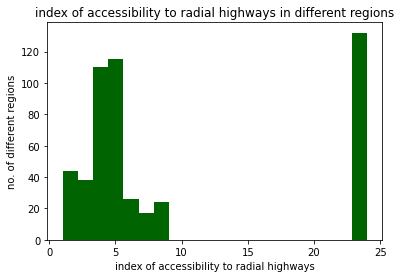

In [166]:
# analyzing RAD: index of accessibility to radial highways 

plt.hist(df['RAD'], bins = 20, color = 'darkgreen')
plt.title('index of accessibility to radial highways in different regions')
plt.xlabel('index of accessibility to radial highways')
plt.ylabel('no. of different regions')
plt.show()

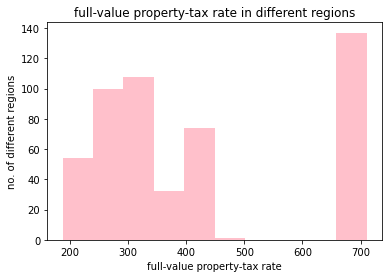

In [168]:
# analyzing TAX: full-value property-tax rate per $10,000 

plt.hist(df['TAX'], bins = 10, color = 'pink')
plt.title('full-value property-tax rate in different regions')
plt.xlabel('full-value property-tax rate')
plt.ylabel('no. of different regions')
plt.show()

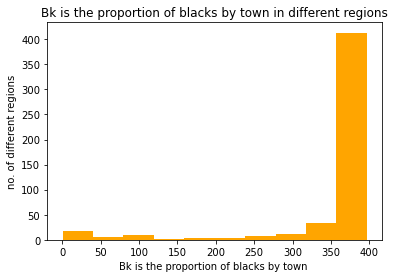

In [169]:
# analyzing B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 

plt.hist(df['B'], bins = 10, color = 'orange')
plt.title('Bk is the proportion of blacks by town in different regions')
plt.xlabel('Bk is the proportion of blacks by town ')
plt.ylabel('no. of different regions')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

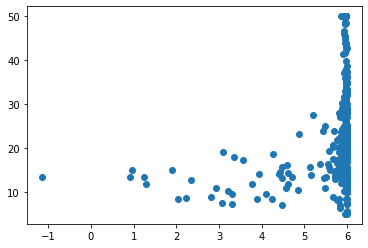

In [173]:
plt.scatter(df['B'], df['target'])
plt.show

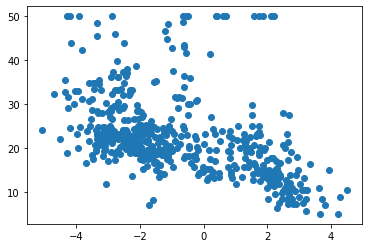

In [174]:
plt.scatter(df['CRIM'], df['target'])
plt.show()

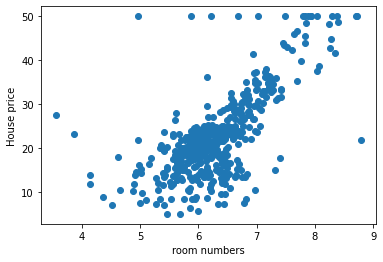

In [175]:
x=df['RM']
y=df['target']
plt.scatter(x,y)
plt.xlabel("room numbers")
plt.ylabel('House price')
plt.show()

This is showing a positive relation as room no. is increasing, house prices are also increasing

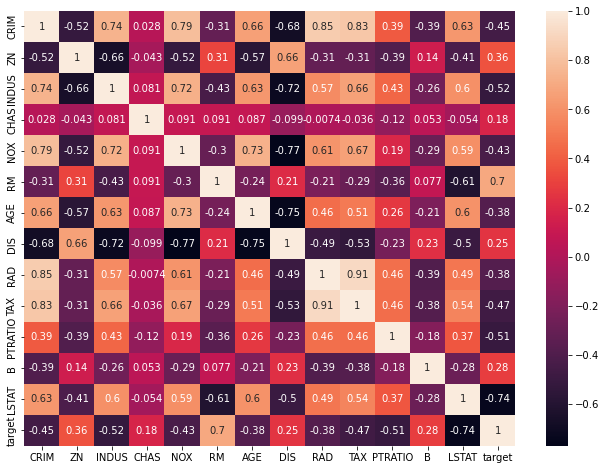

In [176]:
corr_hmap=df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr_hmap, annot=True)
plt.show()

Lighter color shows the positive relation b/w the data while as the color is getting darker it shows negative relation b/w data.

You can see on X- axis radial highways are there and on y-axis taxes is there, we can see the positive relation between these twos as at any place where there are high taxes means the facilities are also high there(as here highways are present)

Same with taxes and PTratio(pupil teacher) ratio, the places where taxes are high so that place will maintain a good pupil teacher ratio.

If we take target of Y-Axis and compare it with all the variables present on x-axis, we can see target and LSTAT has the highest negative relation means LSTAT is providing negative input to the house prices. So what one can think, the column which provide very much negative coorelation to our target then one can think to drop it

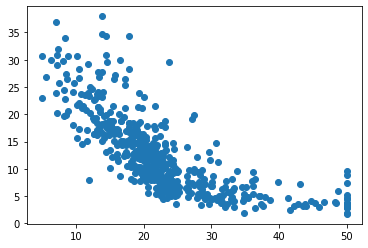

In [177]:
plt.scatter(df['target'], df['LSTAT'])
plt.show()

here we can see house prices are declining where low status people are living

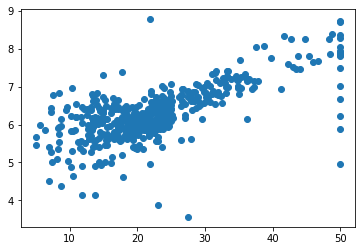

In [178]:
plt.scatter(df['target'], df['RM'])
plt.show()

with increase in room no. house prices are also increasing, so it is showing a positive relation

In [179]:
#as LSTAT is reacting very negative to the house prices we can think to drop it
df.drop('LSTAT',axis=1,inplace=True)

In [180]:
#LSTAT dropped
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,target
0,-5.064036,18.0,0.837248,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,5.983684,24.0
1,-3.600502,0.0,1.955860,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,5.983684,21.6
2,-3.601235,0.0,1.955860,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,5.973377,34.7
3,-3.430523,0.0,0.779325,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,5.977949,33.4
4,-2.672924,0.0,0.779325,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.983684,36.2


In [181]:
#Now we have to do cleansing of data(remove outliers)

df_new=df[(z<3).all(axis=1)] 

In [182]:
df.shape

(506, 13)

In [183]:
df_new.shape

(415, 13)

In [184]:
df=df_new
df.shape

(415, 13)

In [185]:
#now we want only input data because we want to make them train_test_split
#if we need only input then x=df.iloc[:,0:-1]
#if we want only output then y=df.iloc[:,-1]

In [186]:
x=df.iloc[:,0:-1]
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,-5.064036,18.0,0.837248,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,5.983684
1,-3.600502,0.0,1.955860,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,5.983684
2,-3.601235,0.0,1.955860,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,5.973377
3,-3.430523,0.0,0.779325,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,5.977949
4,-2.672924,0.0,0.779325,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.983684


In [187]:
y=df.iloc[:,-1]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [188]:
x.shape

(415, 12)

In [189]:
y.shape

(415,)

## Modelling

In [190]:
#splitting our data into training and testing
#test_size=.33 means we have put 33% data in testing
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [191]:
x_train.shape #out of 415 rows 67% is 278 rows which comes in x_train

(278, 12)

In [192]:
y_train.shape #out of 415 rows 67% is 278 rows which comes in y_train

(278,)

In [193]:
x_test.shape #out of 415 rows 33% is 137 rows which comes in x_train

(137, 12)

In [194]:
y_test.shape #out of 415 rows 67% is 278 rows which comes in y_train

(137,)

Once our data is ready, we need to call linear regression, so to call it we need to make instance(a variable) of that particular linear regression class

In [195]:
lm=LinearRegression()

In [196]:
lm.fit(x_train,y_train)

LinearRegression()

In [197]:
lm.coef_

array([ 5.87516315e-01, -1.86891814e-02, -1.33207458e+00, -6.49619247e-14,
       -1.12867267e+01,  8.09394012e+00, -7.05029917e-02, -1.16103312e+00,
        1.99460945e-02, -1.00405561e-02, -7.36134849e-01,  2.73276894e+00])

these are internally calcualted coefficient value, some are +ve some are-ve, +ves are going to add in house prices and -ve coefficient are going to subtract the house prices, so all these are internally done by the coefficient.

In [198]:
lm.intercept_

-8.336324280305611

In [199]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'target'],
      dtype='object')

Now i need to check out what is the score, means how much our machine has learnt through training data, lm.score is the method by which we can do this

In [200]:
lm.score(x_train, y_train)

0.7501917280119432

0.75 is 75%, means 75% learning is possible, 74% i have understood your data by the model linearRegression lm

Now we need to give prediction, during prediction we need to give only test data

In [201]:
#predict the value
pred=lm.predict(x_test)
print("Predicted result price:", pred)
print("Actual Price", y_test)

Predicted result price: [20.52845206 14.31874008 31.59362629 18.32661265 13.46063882 20.94009449
 17.52786944 24.66402075 29.90456574 11.05915032 17.74928452 15.85172432
  9.21605646 25.20998669 27.84701084 11.025416   24.50427437 27.21971921
 25.75448327 14.12309214 21.89496835 18.68173391 23.02232498 12.24861883
 21.37796427 21.43961576 32.0944602  27.75267604 21.88790844 24.99361674
 31.70683266 15.18741119 13.75570288 25.93914024 15.37035749 15.54454131
 26.19333336 23.20045326 13.65998498 18.69456353 17.25046389 18.41974869
 19.57955159 27.1738724  17.50547408 25.92399607 19.93237195 19.13968504
 17.61257003 24.01827863 20.29588648 17.93453022 40.24980049 13.95680295
 19.10065627 21.78284337 18.54181742 40.90338585 19.71920554 18.23519721
 26.50836184 16.69433606 24.43002262 27.85504592 14.91668934  5.95515799
 34.67493999 19.62540778 19.44221057 22.50921886 35.59409089 18.9753338
 24.53416273 24.4103965  15.34516995 22.31327296 16.70838593 18.25429366
 22.47041845 16.71389755 17.

### Performing model validation

In [202]:
#these are the metrices which are giving me the performance of the module
print('error:')
print('mean absolute error:', mean_absolute_error(y_test, pred))
print('mean squared error:', mean_squared_error(y_test, pred))
print('root mean squared error:', np.sqrt(mean_squared_error(y_test, pred)))

error:
mean absolute error: 2.818977835220746
mean squared error: 25.521416834836096
root mean squared error: 5.0518726067505


In [203]:
#r2 score -->coefficient of determination
#is the proportation of the variance in the dependent variable that is predictable from the independent variable(s).
#i.e. change coming in y whenever x is being changed

from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.558620849266642


55% change is coming in the value whenever input independent values are changed

## Saving our model

In [113]:
import pickle 

filename='picklesvfile.pkl'
pickle.dump(lm,open(filename,'wb'))

#load the model from the disk
loaded_model=pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([20.51287805, 14.42745822, 31.62288786, 18.33523258, 13.31046852,
       20.93260802, 17.45428164, 24.67296935, 29.90430192, 11.03342623,
       17.70665219, 15.83537833,  9.1203292 , 25.24364621, 27.86465531,
       10.91886537, 24.5175522 , 27.19626043, 25.74578256, 13.97597206,
       21.89842835, 18.6865157 , 23.02781579, 12.22239311, 21.37301387,
       21.47204814, 32.08803103, 27.7650971 , 21.79806527, 25.0007926 ,
       31.72604894, 15.14070348, 13.59831375, 25.9189667 , 15.34830023,
       15.49617263, 26.14680563, 23.1572345 , 13.70902474, 18.7336394 ,
       17.18307288, 18.43829237, 19.56636448, 27.17816602, 17.51943797,
       25.95372521, 19.78926494, 19.15909323, 17.64111781, 24.01283224,
       20.33442772, 18.86008572, 40.28445666, 13.82592534, 19.06617783,
       21.73107579, 18.56832019, 40.85914938, 19.73201446, 18.24983278,
       26.48850624, 16.67014612, 24.4498214 , 27.86402901, 14.8651084 ,
        5.94412091, 34.65224801, 19.41530889, 19.48123755, 22.54